In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import matplotlib.ticker as mticker

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DataSet/NYC Accidents 2020.csv')

Accidents de la circulation à New York

À propos du Dataset

Collisions de véhicules à moteur signalées par le département de police de la ville de New York de janvier à août 2020. Chaque enregistrement représente une collision individuelle, y compris la date, l'heure et le lieu de l'accident (arrondissement, code postal, nom de rue, latitude/longitude), les véhicules et les victimes impliqués et les facteurs contributifs.


Analyse recommandée


*   Comparez le pourcentage d'accidents totaux par mois. Remarquez-vous des tendances saisonnières ?
*   Répartissez la fréquence des accidents par jour de la semaine et par heure de la journée. Sur la base de ces données, à quel moment les accidents se produisent-ils le plus fréquemment ?
*   Dans quelle rue en particulier a-t-on enregistré le plus d'accidents ? Quel pourcentage cela représente-t-il par rapport à tous les accidents signalés ?
*   Quel était le facteur contributif le plus courant pour les accidents signalés dans cet échantillon (sur la base du véhicule 1) ? Qu'en est-il spécifiquement des accidents mortels ?




In [4]:
df.shape

(74881, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74881 entries, 0 to 74880
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     74881 non-null  object 
 1   CRASH TIME                     74881 non-null  object 
 2   BOROUGH                        49140 non-null  object 
 3   ZIP CODE                       49134 non-null  float64
 4   LATITUDE                       68935 non-null  float64
 5   LONGITUDE                      68935 non-null  float64
 6   LOCATION                       68935 non-null  object 
 7   ON STREET NAME                 55444 non-null  object 
 8   CROSS STREET NAME              35681 non-null  object 
 9   OFF STREET NAME                19437 non-null  object 
 10  NUMBER OF PERSONS INJURED      74881 non-null  int64  
 11  NUMBER OF PERSONS KILLED       74881 non-null  int64  
 12  NUMBER OF PEDESTRIANS INJURED  74881 non-null 

Crash Information:




*   CRASH DATE, CRASH TIME: Date et heure de la collision.
*   BOROUGH, ZIP CODE, LATITUDE, LONGITUDE: Détails de l'emplacement de l'accident.
*   LOCATION, ON STREET NAM, COFF STREET NAME, OFF STREET NAME: Informations spécifiques à la rue.
*   Injuries & Fatalities:
NOMBRE DE PERSONNES BLESSÉES, NOMBRE DE PERSONNES TUÉES.
NOMBRE DE PIÉTONS/CYCLISTES/AUTOMOBILISTES BLESSÉS/ TUÉS.

Détails de la collision :
*   CONTRIBUTING FACTOR VEHICLE 1,2,3,4,5: La cause de la collision pour chaque véhicule.
*   VEHICLE TYPE CODE 1,2,3,4,5: Types de véhicules impliqués.



In [6]:
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.8921,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.6905,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.8165,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


<Axes: ylabel='count'>

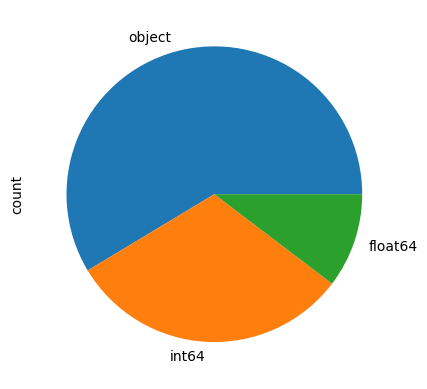

In [7]:
#le type de variable qui se trouve dans ce dataset
df.dtypes.value_counts().plot.pie()

In [8]:
# type des colonnes
types_colonnes = df.dtypes
print(types_colonnes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED          int64
NUMBER OF PERSONS KILLED           int64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [9]:
#le nombre de doublons
doublons = df.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

Nombre de doublons : 0


In [10]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [11]:
#visibilité rapide par le digramme pour avoir un apperçu des valeurs manquantes

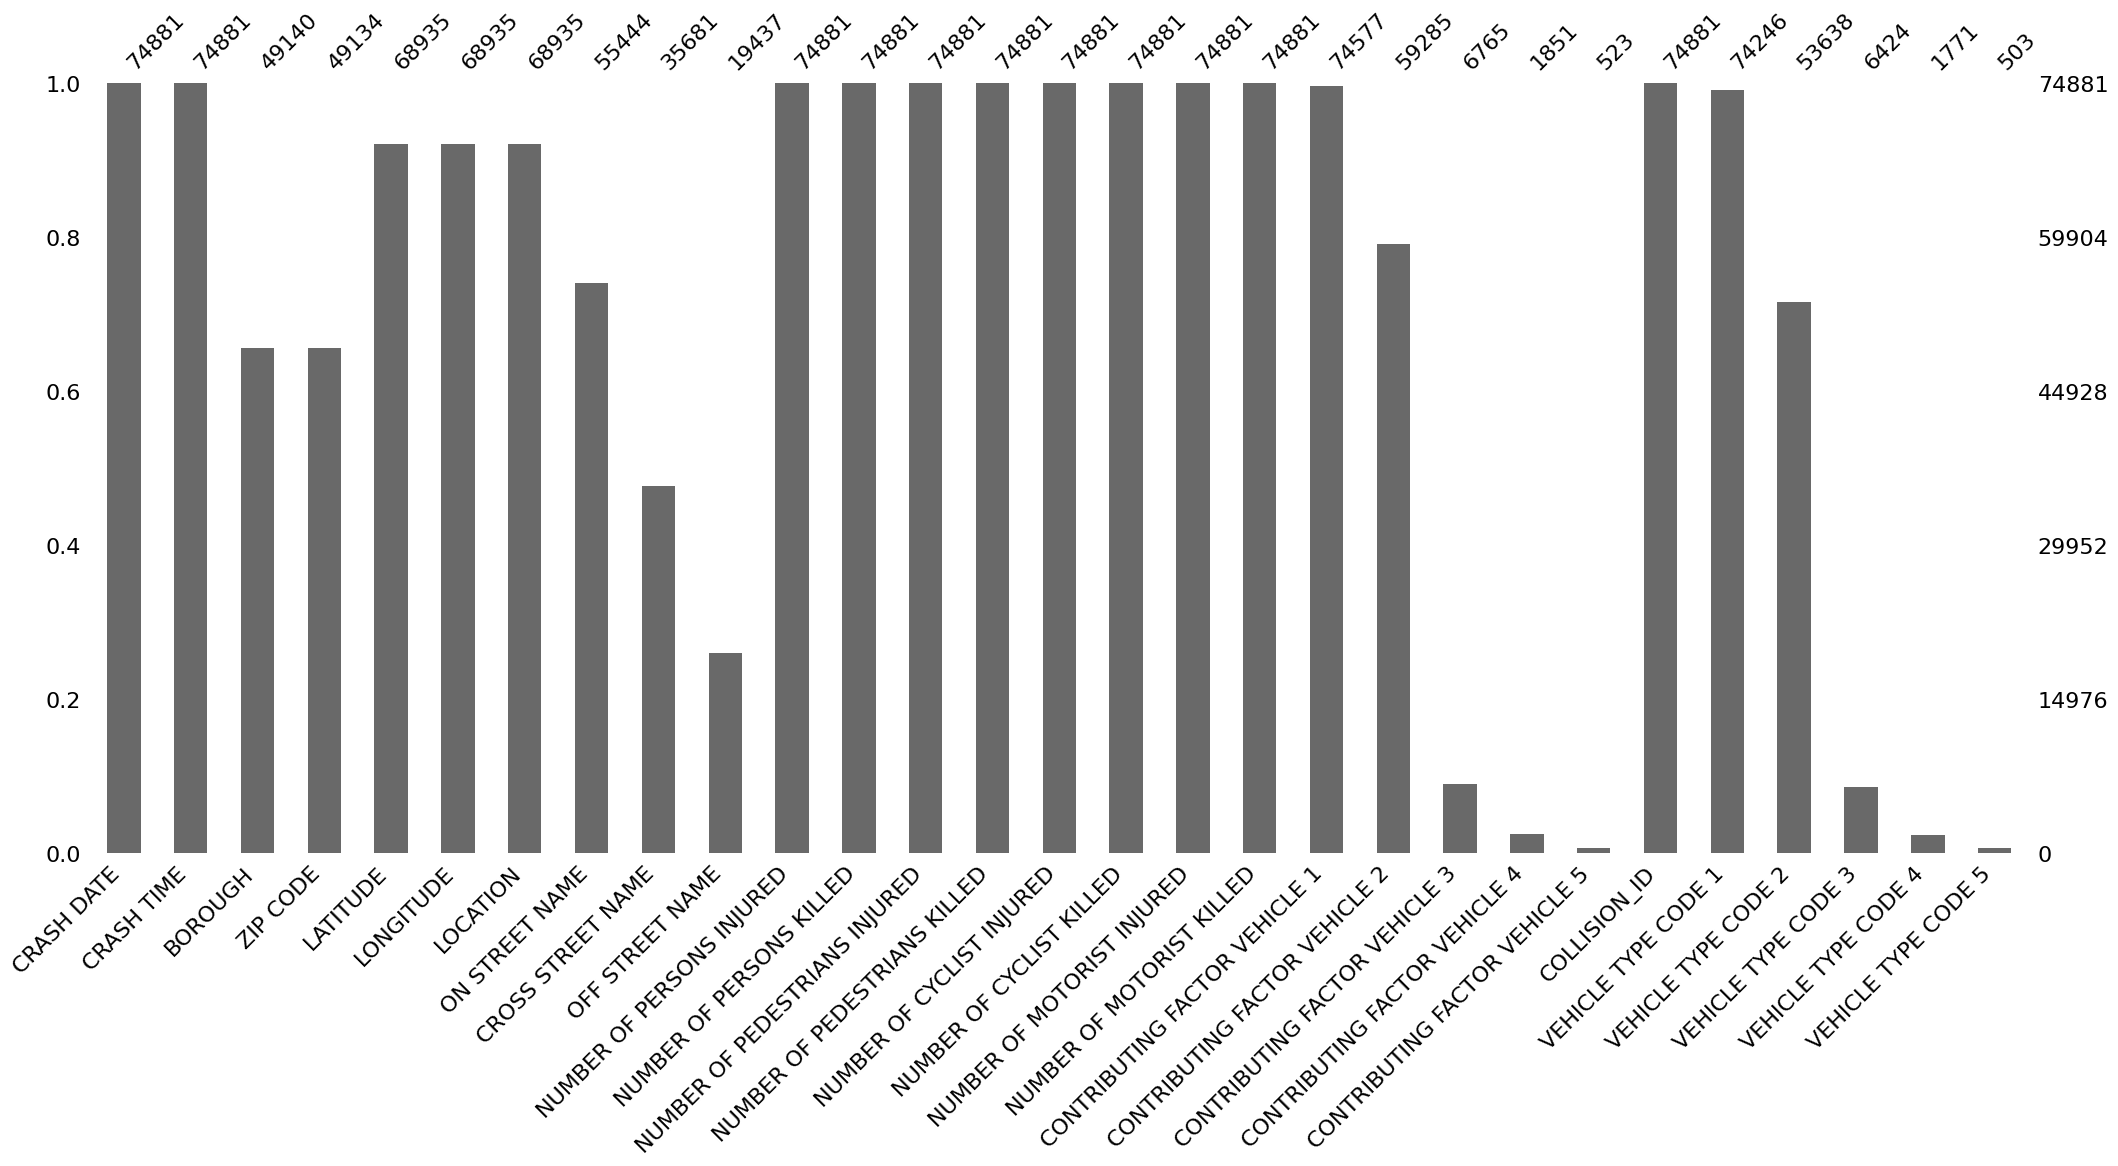

In [12]:
msno.bar(df)
plt.show()

In [13]:
#nbre de valeur manquante ainsi que son pourcentage
missing_value= df.isnull().sum()
missing_per = (missing_value/len(df))*100
missing_table = pd.DataFrame({'Missing value': missing_value, 'Percentage': missing_per})
print(missing_table)

                               Missing value  Percentage
CRASH DATE                                 0    0.000000
CRASH TIME                                 0    0.000000
BOROUGH                                25741   34.375876
ZIP CODE                               25747   34.383889
LATITUDE                                5946    7.940599
LONGITUDE                               5946    7.940599
LOCATION                                5946    7.940599
ON STREET NAME                         19437   25.957185
CROSS STREET NAME                      39200   52.349728
OFF STREET NAME                        55444   74.042815
NUMBER OF PERSONS INJURED                  0    0.000000
NUMBER OF PERSONS KILLED                   0    0.000000
NUMBER OF PEDESTRIANS INJURED              0    0.000000
NUMBER OF PEDESTRIANS KILLED               0    0.000000
NUMBER OF CYCLIST INJURED                  0    0.000000
NUMBER OF CYCLIST KILLED                   0    0.000000
NUMBER OF MOTORIST INJURED     

In [14]:
# pourcentage des valeurs manquantes par odre croissant, ici l'idéé est d'avoir une vue claire des
# colonnes qui seront potentienlement supprimées
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

,0
CRASH DATE,0.000000
COLLISION_ID,0.000000
NUMBER OF MOTORIST KILLED,0.000000
NUMBER OF MOTORIST INJURED,0.000000
NUMBER OF CYCLIST KILLED,0.000000
NUMBER OF PEDESTRIANS KILLED,0.000000
NUMBER OF PEDESTRIANS INJURED,0.000000
NUMBER OF PERSONS KILLED,0.000000
NUMBER OF PERSONS INJURED,0.000000
NUMBER OF CYCLIST INJURED,0.000000


Les 8 dernières colonnes contiennent plus de 50 % de données manquantes, ce qui les rend non exploitables pour l'nalyses.
La colonne CROSS STREET NAME présente 52 % de valeurs manquantes, ce qui justifie en principe sa suppression.

Cependant, avant de prendre cette décision, je prévois de vérifier son contenu plus en détail, car certaines colonnes, malgré un pourcentage élevé de valeurs manquantes, peuvent encore contenir des informations pertinentes.

In [14]:
#je vais supprimer les colonnes avec un pourcentage de valeurs manquantes supérieur à 50%

In [15]:
pourcentage = 0.5
taux = df.notnull().mean()
col_def = taux [taux > (1 - pourcentage)].index

In [16]:
df = df[col_def]

In [17]:
#vérification
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

,0
CRASH DATE,0.000000
COLLISION_ID,0.000000
NUMBER OF MOTORIST KILLED,0.000000
NUMBER OF MOTORIST INJURED,0.000000
NUMBER OF CYCLIST KILLED,0.000000
NUMBER OF CYCLIST INJURED,0.000000
NUMBER OF PEDESTRIANS KILLED,0.000000
NUMBER OF PERSONS KILLED,0.000000
NUMBER OF PEDESTRIANS INJURED,0.000000
CRASH TIME,0.000000


In [18]:
df['NUMBER OF PERSONS KILLED'].unique()

array([0, 1, 2, 3, 4])

Avant d'aller plus loin je vais changer le format date et time par le format correct pource type de donnée

In [19]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S').dt.time

<Axes: ylabel='count'>

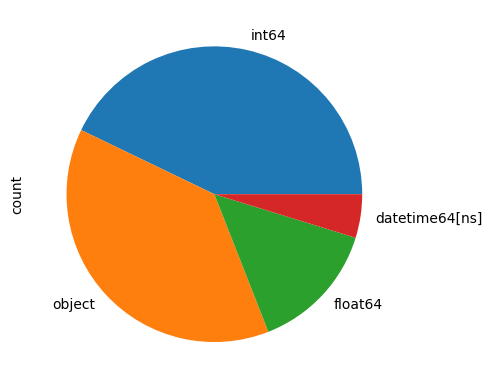

In [20]:
df.dtypes.value_counts().plot.pie()

In [ ]:
df.to_excel('nyc_test.xlsx', index=False)

Après avoir sauvegardé le fichier au format Excel, j'ai procédé à une visualisation et à une vérification rapide de certains éléments. J'ai constaté que les colonnes "Vehicle Type Code 1" et "Vehicle Type Code 2" contenaient des termes similaires mais exprimés différemment. Étant donné que la colonne "Vehicle Type Code 1" présente 635 valeurs manquantes, je vais conserver cette colonne et ne pas utiliser "Vehicle Type Code 2".

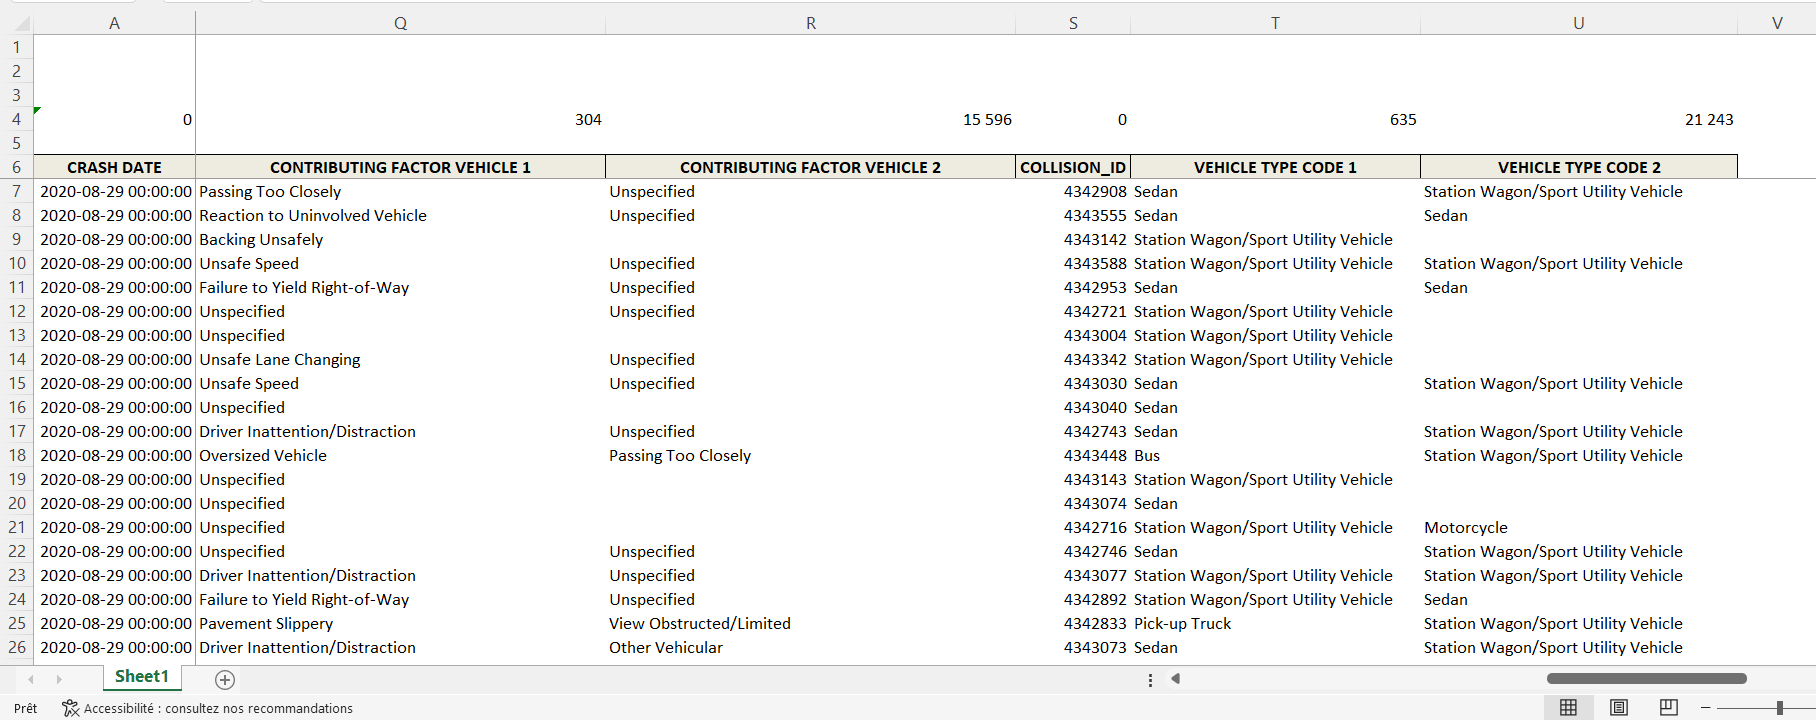

In [21]:
df['CRASH TIME'].head(2)

,CRASH TIME
0,15:40:00
1,21:00:00


In [22]:
df['CRASH DATE'].head(2)

,CRASH DATE
0,2020-08-29
1,2020-08-29


Il est possible d'extraire le mois et la date de chaque accident.
À partir de la date, je peux répartir les heures des accidents en fonction des périodes de la journée, telles que le matin, le midi et le soir,ce qui pourrait s'avérer pertinent pour des analyses futures.

In [23]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['Month'] = df['CRASH DATE'].dt.month

In [24]:
df['Jour_sem'] = df['CRASH DATE'].dt.day_name()
df['Heure'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S').dt.hour

In [25]:
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,Month,Jour_sem,Heure
0,2020-08-29,15:40:00,BRONX,10466.0,40.8921,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,0,0,...,0,0,Passing Too Closely,Unspecified,4342908,Sedan,Station Wagon/Sport Utility Vehicle,8,Saturday,15
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.6905,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,2,0,...,2,0,Reaction to Uninvolved Vehicle,Unspecified,4343555,Sedan,Sedan,8,Saturday,21
2,2020-08-29,18:20:00,NaN,NaN,40.8165,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,1,0,...,0,0,Backing Unsafely,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,8,Saturday,18


#Traitement des valeurs manquantes

j'ai longuemnt refléchis, j'ai établi une approche générale pour le traitement des valeurs manquantes dans mes données :


*   Les valeurs manquantes dans les colonnes de localisation (BOROUGH, ZIP CODE, ON STREET NAME) seront remplacées par "Unclassified".

*   Les colonnes numériques concernant les blessés et les morts sont imputées avec la médiane.

*   Les facteurs contributifs manquants sont remplacés par "Unspecified".






In [ ]:
df['BOROUGH'].fillna('Unclassified', inplace=True)
df['ZIP CODE'].fillna('Unclassified', inplace=True)
df['ON STREET NAME'].fillna('Unclassified', inplace=True)
df['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)
df['CONTRIBUTING FACTOR VEHICLE 2'].fillna('Unspecified', inplace=True)

In [ ]:
# Remplacer les valeurs manquantes pour les colonnes numériques par la médiane
num_cols = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
            'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
            'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
            'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [ ]:
df['LATITUDE'].fillna('Unclassified', inplace=True)
df['LONGITUDE'].fillna('Unclassified', inplace=True)
df['LOCATION'].fillna('Unclassified', inplace=True)

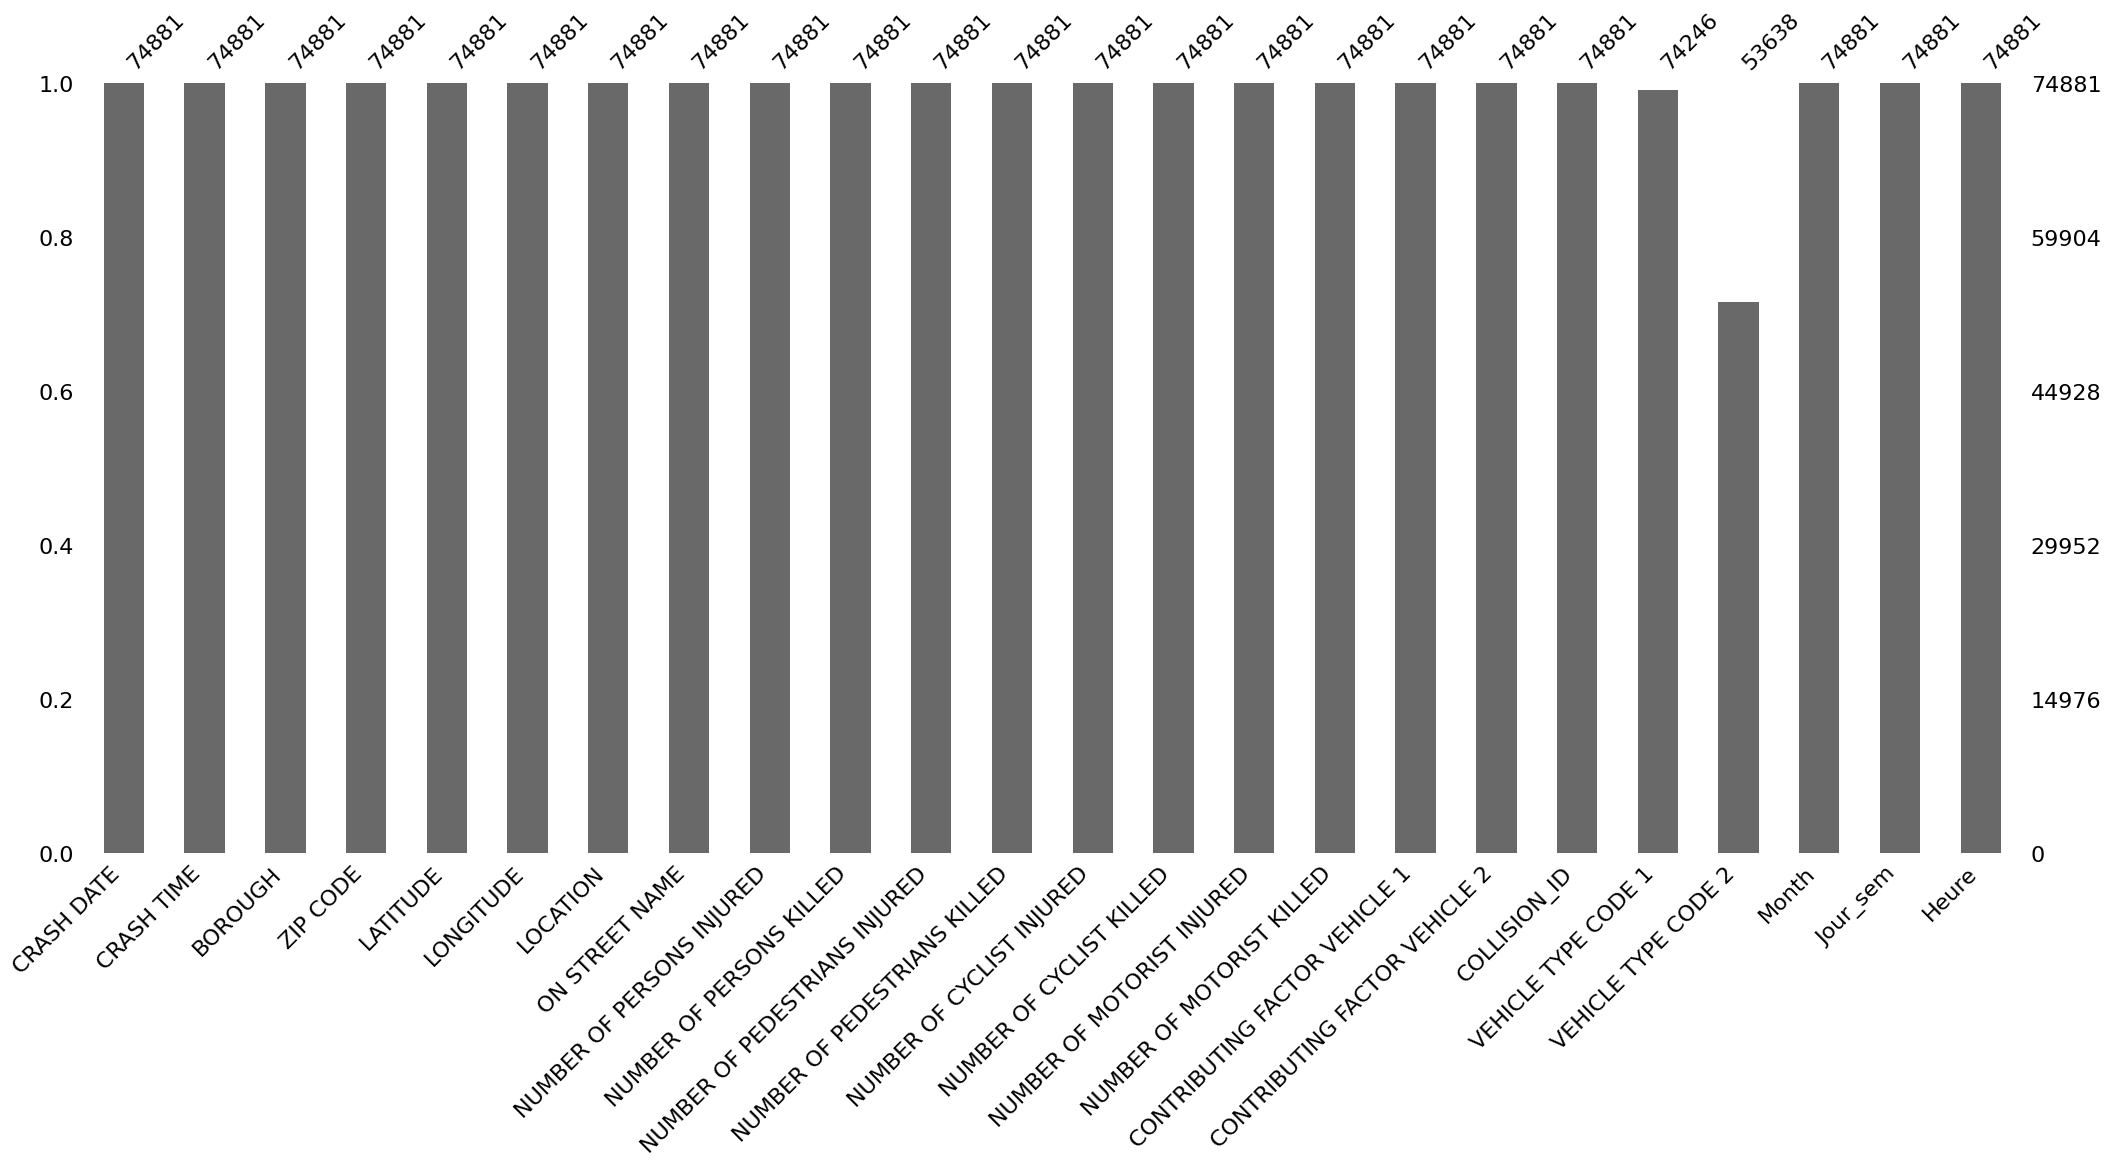

In [29]:
msno.bar(df)
plt.show()

In [110]:
df = df.drop('VEHICLE TYPE CODE 2', axis=1)

#tests statistiques

Pour vérifier des relations potentielles entre les accidents, le mois, les jours de la semaine, et d'autres variables, je vais utiliser des tests statistiques ainsi que des visualisations adaptées.

Tests statistiques pour vérifier les relations :
Relation entre mois et accidents : je vais effectuer un test du chi-carré pour voir s'il existe une association entre le mois et le nombre d'accidents.
Relation entre le jour de la semaine et les accidents : Utiliser le test du chi-carré pour tester la dépendance entre les jours de la semaine et les accidents.


j'ai éffctué un test du chi-carré pour voir s'il existe une relation statistiquement significative entre les mois et les jours de la semaine en fonction du nombre d'accidents.

In [30]:
from scipy.stats import chi2_contingency, kruskal

In [31]:
# Lien entre le mois et le jour de la semaine
cross_tab = pd.crosstab(df['Month'], df['Jour_sem'])
chi2, p, dof, expected = chi2_contingency(cross_tab)

print(f"Test du chi-carré pour la relation entre mois et jour de la semaine :")
print(f"Chi2 = {chi2}, p-value = {p}")


Test du chi-carré pour la relation entre mois et jour de la semaine :
Chi2 = 842.8414195017383, p-value = 1.2840044889327258e-149


Le test du chi-carré montre une relation significative entre les mois et les jours de la semaine

**Visualisation des accidents par mois et par jour **


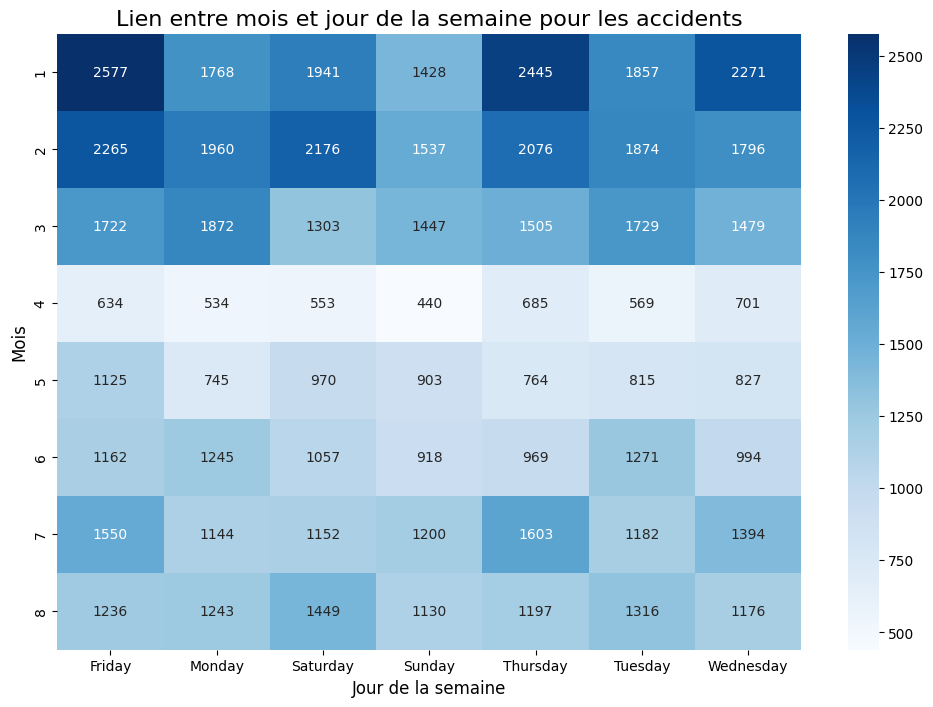

In [32]:
# Visualisation du lien entre mois et jour de la semaine
plt.figure(figsize=(12,8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title("Lien entre mois et jour de la semaine pour les accidents", fontsize=16)
plt.xlabel("Jour de la semaine", fontsize=12)
plt.ylabel("Mois", fontsize=12)
plt.show()

**Interprétation du Heatmap : Lien entre mois et jour de la semaine pour les accidents**


Cette heatmap illustre le nombre d'accidents par jour de la semaine et par mois de l'année 2020 à New York. Voici une interprétation générale en fonction des données observées :




*   Janvier et février sont clairement des mois critiques en termes d'accidents, avec une concentration élevée de collisions, particulièrement les vendredis.
*   La réduction drastique des accidents en avril est probablement liée au confinement, ce qui illustre l'impact des mesures de réduction de mobilité sur la sécurité routière.
*   Le vendredi est le jour le plus dangereux de la semaine, nécessitant une attention particulière pour les politiques de sécurité routière.
*   Les dimanche et lundi sont plus calmes en termes de trafic, avec moins d'accidents signalés, probablement en raison de la nature plus détendue de ces jours.



#Tests statistiques supplémentaires :

Test de différence entre accidents mortels et non mortels selon le mois et le jour de la semaine : Je vais utiliser un test ANOVA ou Kruskal-Wallis pour comparer les distributions des accidents.

In [64]:
# Test ANOVA/Kruskal-Wallis entre les accidents non mortels par mois
non_fatal_grouped = [group['NUMBER OF PERSONS INJURED'].values for name, group in non_fatal_accidents.groupby('Month')]

In [75]:
kruskal_test_non_fatal = kruskal(*non_fatal_grouped)
print(f"Test de Kruskal-Wallis pour les accidents non mortels par mois : p-value = {kruskal_test_non_fatal.pvalue}")

Test de Kruskal-Wallis pour les accidents non mortels par mois : p-value = 1.862375222332982e-296


In [76]:
# Test ANOVA/Kruskal-Wallis pour les accidents mortels par mois
fatal_grouped = [group['NUMBER OF PERSONS KILLED'].values for name, group in fatal_accidents.groupby('Month')]

In [77]:
kruskal_test_fatal = kruskal(*fatal_grouped)
print(f"Test de Kruskal-Wallis pour les accidents mortels par mois : p-value = {kruskal_test_fatal.pvalue}")

Test de Kruskal-Wallis pour les accidents mortels par mois : p-value = 0.6937910177688748




*   Le test du chi-carré montre une relation significative entre les mois et les jours de la semaine (p-value = 1.28e-149).
*   Le test Kruskal-Wallis montre que les accidents non mortels varient de manière significative selon les mois (p-value extrêmement faible). En revanche, les accidents mortels ne montrent pas de variation significative entre les mois (p-value = 0.6937).



#Graphe des deux mois et jours avec le plus d'accidents mortels :

In [106]:
# les 2 mois et 2 jours avec le plus d'accidents
top_2_months = df['Month'].value_counts().nlargest(2).index
top_2_days = df['Jour_sem'].value_counts().nlargest(2).index

In [107]:
# Filtrer les données pour les accidents mortels
fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] > 0]
filtered_fatal = fatal_accidents[fatal_accidents['Month'].isin(top_2_months) & fatal_accidents['Jour_sem'].isin(top_2_days)]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


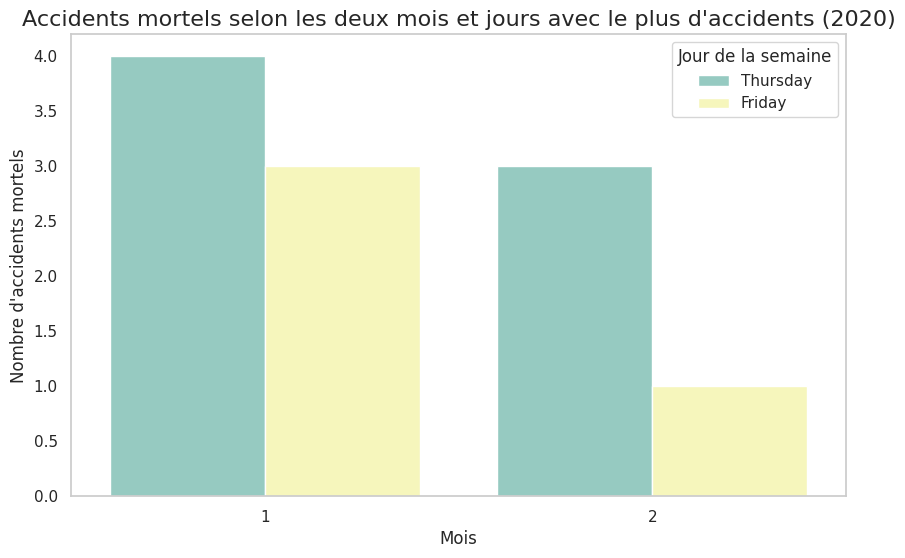

In [108]:
# Afficher le graphe
plt.figure(figsize=(10,6))
sns.countplot(x='Month', hue='Jour_sem', data=filtered_fatal, palette='Set3')
plt.title("Accidents mortels selon les deux mois et jours avec le plus d'accidents (2020)", fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre d\'accidents mortels', fontsize=12)
plt.legend(title='Jour de la semaine')
plt.grid(False)
plt.show()

Globalement, le vendredi semble être le jour avec le plus d'accidents pour chaque mois considéré, tandis que le mardi enregistre généralement le moins d'accidents parmi les 4 jours. Les accidents sont plus fréquents en début d'année (janvier et février), avec une légère diminution à partir de mars et juillet.

#Graphe des quatre mois et jours avec le plus d'accidents non mortels :

In [90]:
# Filtrer les données pour les accidents non mortels
non_fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] == 0]
filtered_non_fatal = non_fatal_accidents[non_fatal_accidents['Month'].isin(top_4_months) & non_fatal_accidents['Jour_sem'].isin(top_4_days)]


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

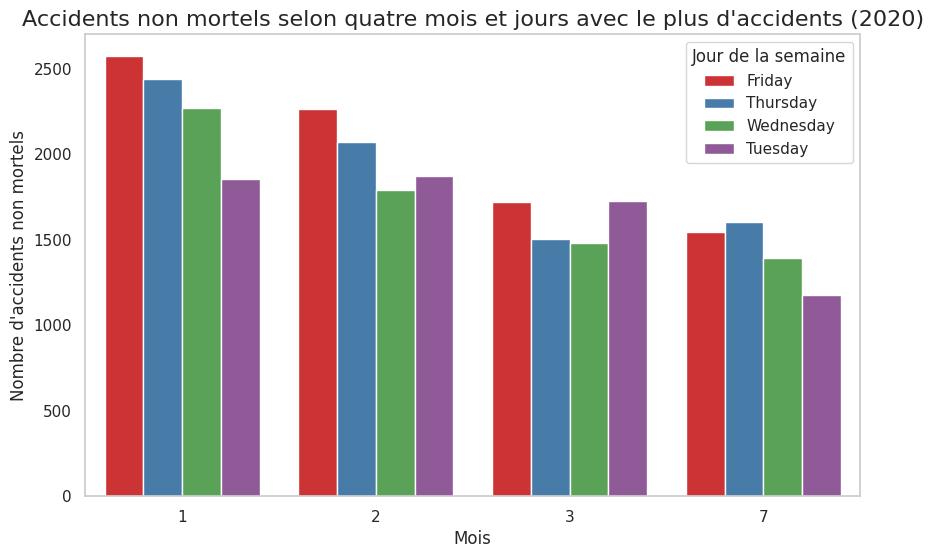

In [91]:
# Afficher le graphe
plt.figure(figsize=(10,6))
sns.countplot(x='Month', hue='Jour_sem', data=filtered_non_fatal, palette='Set1')
plt.title("Accidents non mortels selon quatre mois et jours avec le plus d'accidents (2020)", fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre d\'accidents non mortels', fontsize=12)
plt.legend(title='Jour de la semaine')
plt.grid(False)
plt.show()

# Graphe quatre mois et jours avec le plus d'accidents

In [50]:
# les 4 mois et 4 jours avec le plus d'accidents
top_4_months = df['Month'].value_counts().nlargest(4).index
top_4_days = df['Jour_sem'].value_counts().nlargest(4).index

In [51]:
# Filtrer les données pour ces mois et jours
filtered_data = df[df['Month'].isin(top_4_months) & df['Jour_sem'].isin(top_4_days)]

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

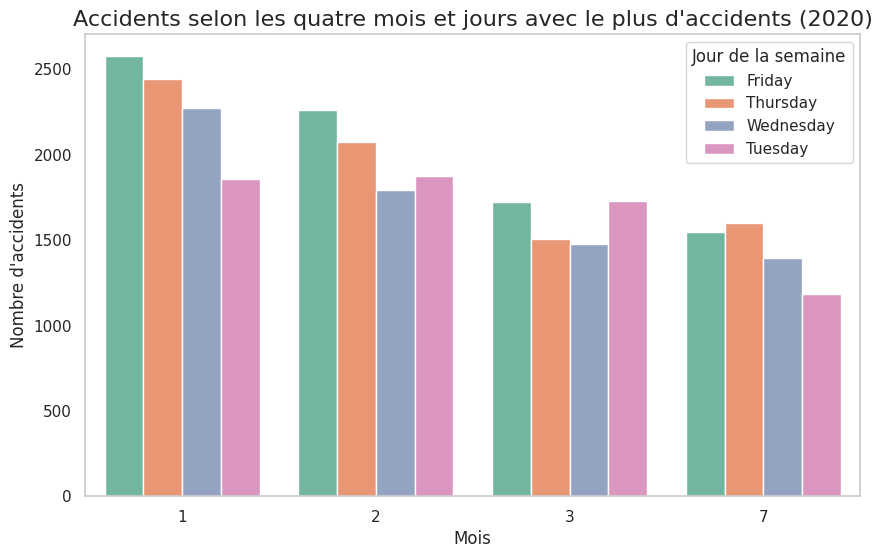

In [52]:
# Afficher le graphe
plt.figure(figsize=(10,6))
sns.countplot(x='Month', hue='Jour_sem', data=filtered_data, palette='Set2')
plt.title("Accidents selon les quatre mois et jours avec le plus d'accidents (2020)", fontsize=16)
plt.xlabel('Mois', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.legend(title='Jour de la semaine')
plt.grid(False)
plt.show()

#Répartition des accidents par arrondissement


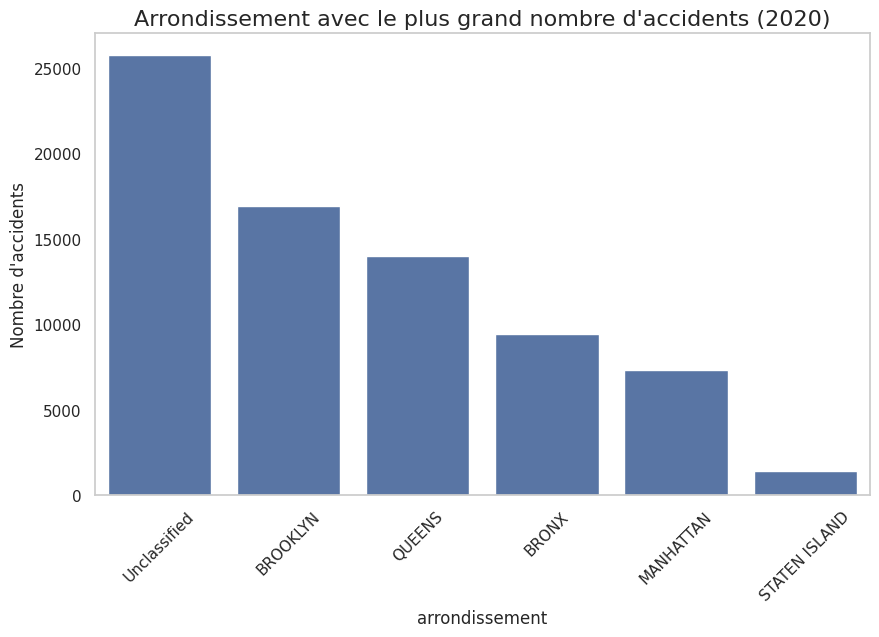

In [100]:
#Arrondissements avec le plus d'accidents
top_7_streets = df['BOROUGH'].value_counts().nlargest(7)

plt.figure(figsize=(10,6))
sns.barplot(x=top_7_streets.index, y=top_7_streets.values)
plt.title('Arrondissement avec le plus grand nombre d\'accidents (2020)', fontsize=16)
plt.xlabel('arrondissement', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Brooklyn est l'arrondissement le plus touché, avec le plus grand nombre d'accidents.

Cependant, il faut noter que une importante quantité des données sur les arrondissements ne sont pas classifiées, ce qui pourrait affecter la fiabilité de cette analyse.

Les arrondissements de Brooklyn, Queens et Bronx sont ceux où le volume d'accidents et le nombre de blessés par accident sont les plus élevés. Des mesures de sécurité renforcées doivent être mises en place dans ces quartiers.

#Nombre d'accidents par jour de la semaine

In [46]:
# Accidents par jour de la semaine
semaine = df['Jour_sem'].value_counts()
print("\nAccidents par jour de la semaine :")
print(semaine)


Accidents par jour de la semaine :
Jour_sem
Friday       12271
Thursday     11244
Wednesday    10638
Tuesday      10613
Saturday     10601
Monday       10511
Sunday        9003
Name: count, dtype: int64


Les données montrent que le vendredi est le jour où le nombre d'accidents est le plus élevé. Cela pourrait s'expliquer par la fatigue des travailleurs en fin de semaine et leur impatience à rentrer chez eux.

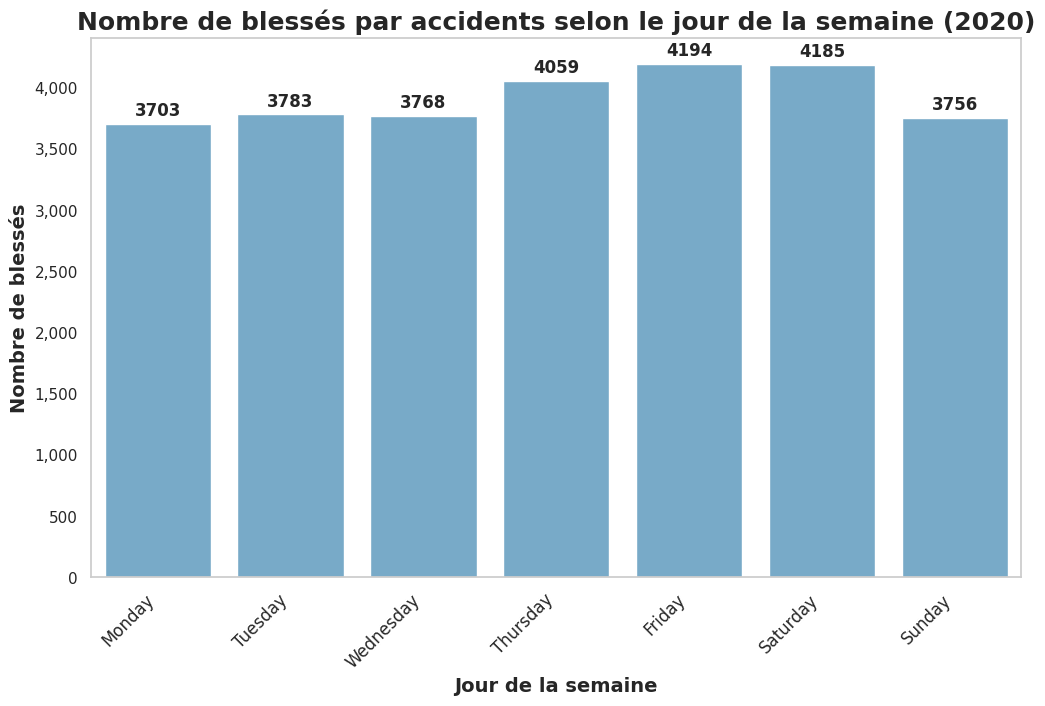

In [112]:

injuries_per_day = df.groupby('Jour_sem')['NUMBER OF PERSONS INJURED'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,7))

color = sns.color_palette("Blues", 1)[0]

bar_plot = sns.barplot(x=injuries_per_day.index, y=injuries_per_day.values, color=color)

plt.title('Nombre de blessés par accidents selon le jour de la semaine (2020)', fontsize=18, fontweight='bold')
plt.xlabel('Jour de la semaine', fontsize=14, fontweight='bold')
plt.ylabel('Nombre de blessés', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

for i in bar_plot.containers:
    bar_plot.bar_label(i, fmt='%d', fontsize=12, padding=3, weight='bold')

plt.grid(False)
plt.show()

Les analyses montrent que le nombre de blessés est plus élevé durant les week-ends, notamment le samedi et le dimanche

Des campagnes de sensibilisation à la conduite prudente pourraient être intensifiées en fin de semaine pour réduire les risques d'accidents.

In [48]:
# Accidents par heure de la journée
heure_acc = df['Heure'].value_counts().sort_index()
print("\nAccidents par heure de la journée :")
print(heure_acc)


Accidents par heure de la journée :
Heure
0     2948
1     1474
2     1139
3      989
4      975
5     1178
6     1868
7     2463
8     3678
9     3439
10    3525
11    3803
12    4054
13    4458
14    5016
15    4677
16    5219
17    4974
18    4696
19    3738
20    3138
21    2711
22    2557
23    2164
Name: count, dtype: int64


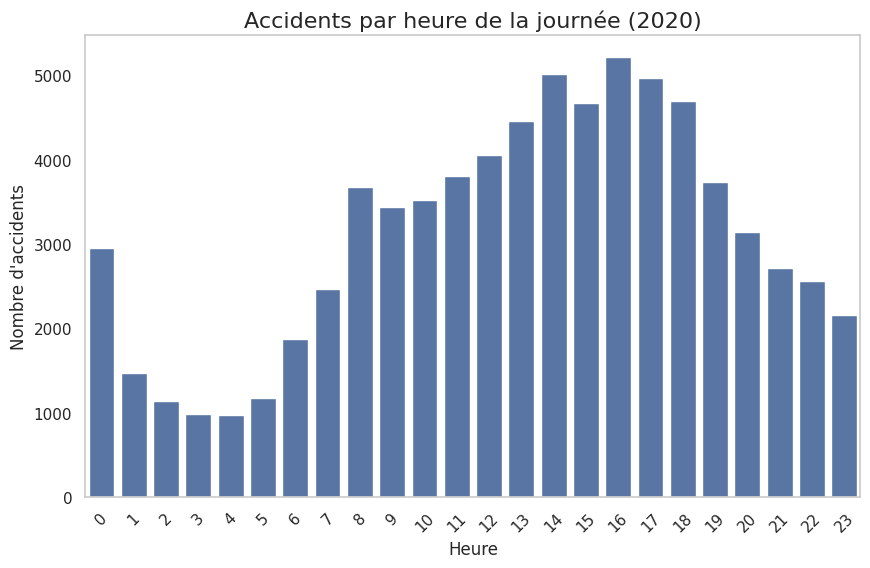

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x=heure_acc.index, y=heure_acc.values)
plt.title('Accidents par heure de la journée (2020)', fontsize=16)
plt.xlabel('Heure', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

Le volume d'accident augmente progressivement tout au long de la journée, atteignant un pic significatif en après-midi et en soirée. Ces moments de la journée semblent particulièrement critiques.

Les heures de pointe sont également particulièrement accidentogènes, avec un pic observé en fin de journée (16h).



# Les rues avec les plus grands accidents

In [53]:
# La Rue avec le plus grand nombre d'accidents
street_accidents = df['ON STREET NAME'].value_counts()
most_accident_prone_street = street_accidents.idxmax()
most_accident_prone_count = street_accidents.max()
total_accidents = len(df)
most_accident_prone_percentage = (most_accident_prone_count / total_accidents) * 100

print(f"\nRue avec le plus grand nombre d'accidents : {most_accident_prone_street} ({most_accident_prone_percentage:.2f}% de tous les accidents)")


Rue avec le plus grand nombre d'accidents : Unclassified (25.96% de tous les accidents)


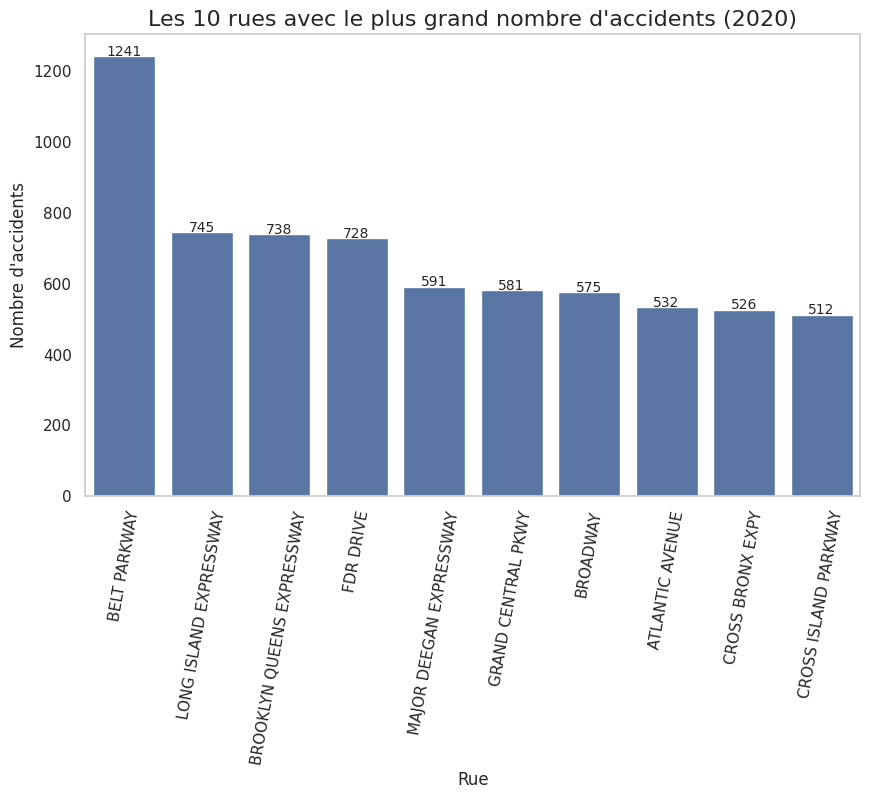

In [99]:
# Filtrer les valeurs pour exclure "Unclassified"
filtered_df = df[df['ON STREET NAME'] != 'Unclassified']

top_10_streets = filtered_df['ON STREET NAME'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_streets.index, y=top_10_streets.values)
plt.title('Les 10 rues avec le plus grand nombre d\'accidents (2020)', fontsize=16)
plt.xlabel('Rue', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(rotation=80)
plt.grid(False)

for index, value in enumerate(top_10_streets.values):
    plt.text(index, value + 1, str(value), ha='center', fontsize=10)

plt.show()

#Facteurs contributifs

In [55]:
# Facteur contributif le plus fréquent pour les accidents
common_factor = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()
print(f"\nFacteur contributif le plus fréquent : {common_factor}")


Facteur contributif le plus fréquent : Unspecified


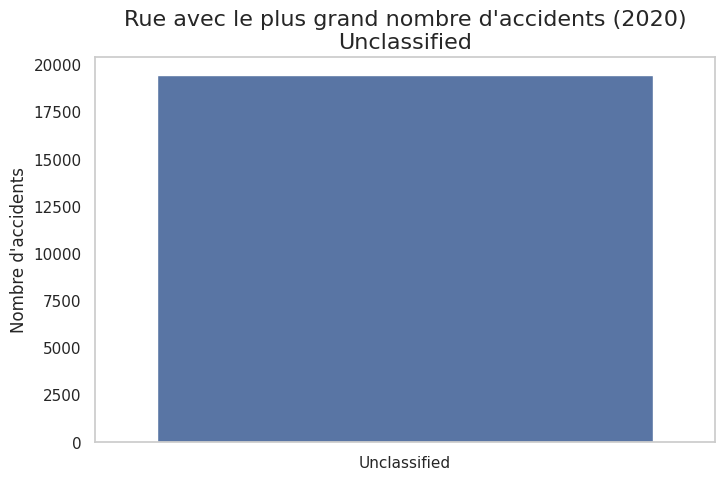

In [56]:
# Barre représentant la rue avec le plus d'accidents
plt.figure(figsize=(8,5))
sns.barplot(x=[most_accident_prone_street], y=[most_accident_prone_count])
plt.title(f'Rue avec le plus grand nombre d\'accidents (2020)\n{most_accident_prone_street}', fontsize=16)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.grid(False)
plt.show()

In [57]:
# Facteur contributif le plus fréquent pour les accidents
common_factor = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()
print(f"\nFacteur contributif le plus fréquent : {common_factor}")


Facteur contributif le plus fréquent : Unspecified


In [58]:
# Facteur contributif pour les accidents mortels
fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] > 0]
fatal_common_factor = fatal_accidents['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().idxmax()


In [59]:
print(f"Facteur contributif le plus fréquent dans les accidents mortels : {fatal_common_factor}")

Facteur contributif le plus fréquent dans les accidents mortels : Unsafe Speed


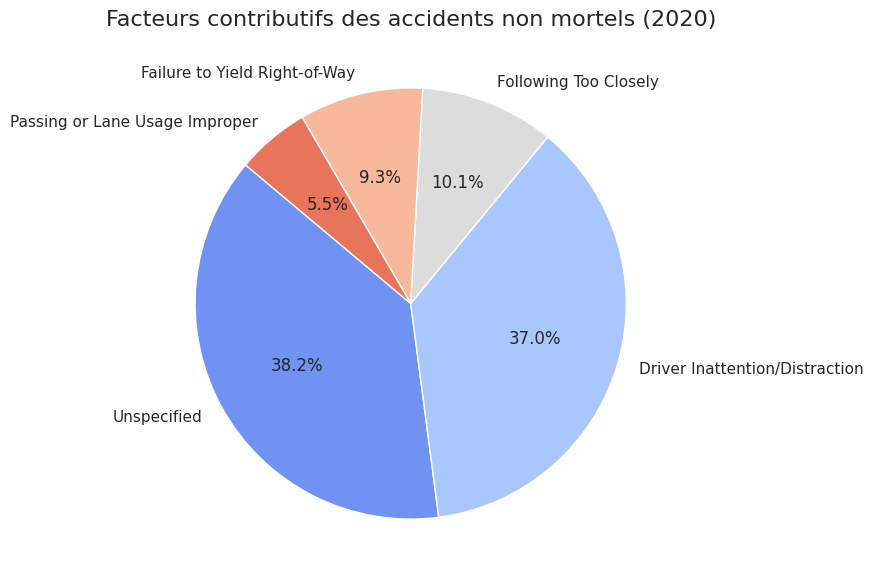

In [104]:
non_fatal_accidents = df[df['NUMBER OF PERSONS KILLED'] == 0]
non_fatal_factors = non_fatal_accidents['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(5)

plt.figure(figsize=(7,7))
plt.pie(non_fatal_factors, labels=non_fatal_factors.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', 5), startangle=140)
plt.title('Facteurs contributifs des accidents non mortels (2020)', fontsize=16)
plt.show()

Le facteur "Unspecified" est largement dominant pour les accidents en général, ce qui indique un manque d'informations ou une mauvaise classification dans les rapports d'accidents.

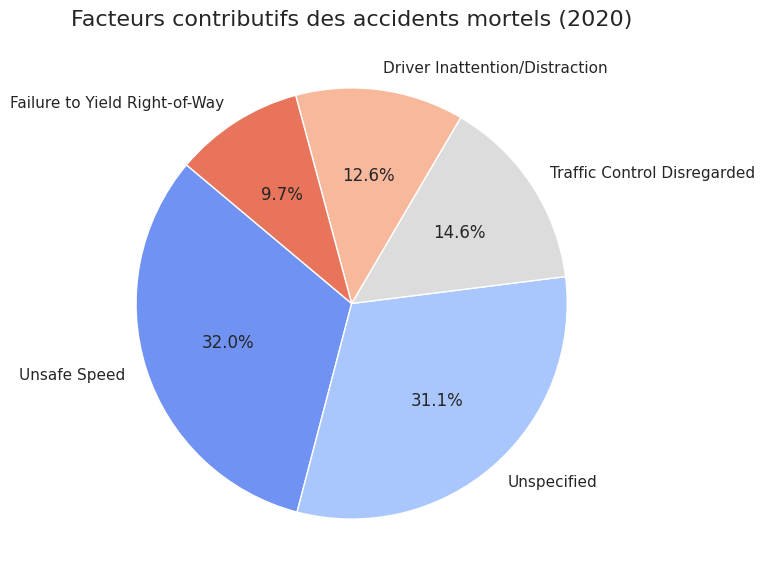

In [62]:
plt.figure(figsize=(7,7))
fatal_factors_counts = fatal_accidents['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(5)
plt.pie(fatal_factors_counts, labels=fatal_factors_counts.index, autopct='%1.1f%%', colors=sns.color_palette('coolwarm', 5), startangle=140)
plt.title('Facteurs contributifs des accidents mortels (2020)', fontsize=16)
plt.show()

 La vitesse excessive est clairement un facteur majeur dans les accidents mortels. Des mesures plus strictes pour contrôler la vitesse pourraient réduire le nombre d'accidents graves.

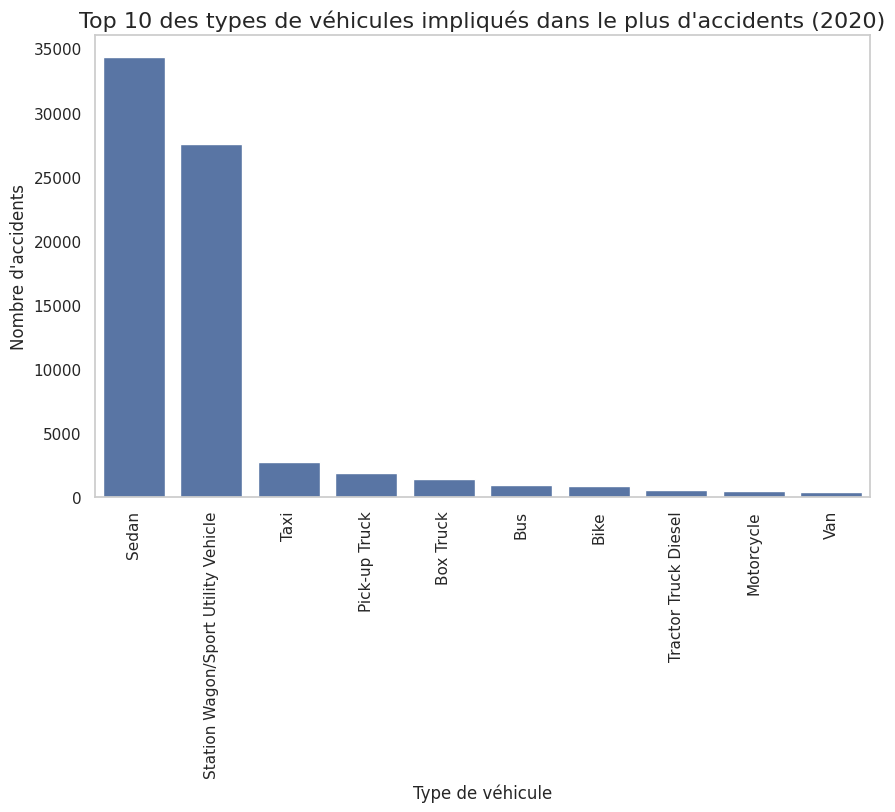

In [63]:
# Les 10 types de véhicules impliqués dans le plus d'accidents
top_10_vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_10_vehicle_types.index, y=top_10_vehicle_types.values)
plt.title('Top 10 des types de véhicules impliqués dans le plus d\'accidents (2020)', fontsize=16)
plt.xlabel('Type de véhicule', fontsize=12)
plt.ylabel('Nombre d\'accidents', fontsize=12)
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

Les voitures particulières (Sedan, Station Wagon, SUV) sont les types de véhicules les plus souvent impliqués dans des accidents.


Cette analyse permet de dégager les points suivants :

*   Les accidents sont plus fréquents en hiver, en fin de semaine et pendant les heures de pointe.
*   Les arrondissements denses comme Brooklyn sont plus touchés.
*   La vitesse excessive est une cause principale des accidents mortels.
*   Installer plus de radars automatiques et augmenter les amendes pour les excès de vitesse pourrait avoir un impact positif sur la réduction des accidents mortels.
*    Des stratégies de gestion de la circulation, comme la synchronisation des feux et des voies réservées pour le covoiturage, pourraient aider à réduire les accidents pendant les heures les plus critiques de la journée.


Pour conclure, les résultats mettent en lumière certaines tendances qui soulignent l'importance d'adapter les mesures de sécurité routière, notamment en ciblant les périodes critiques, les zones à forte densité et les comportements à risque, afin de réduire efficacement les accidents et sauver des vies.